<a href="https://colab.research.google.com/github/sathvik-ujwal/Lab-Codes/blob/main/MACHINE%20LEARNING/Codes/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter

In [3]:
df = pd.DataFrame({
    "points": [18.0, 19.0, 14.0, 11.0, 14.0, 20.0, 28.0, 31.0, 30.0, 35.0, 33.0, 25.0, 25.0, 27.0, 29.0, 30.0, 19.0, 23.0],
    "assists": [3.0, 4.0, 5.0, 7.0, 4.0, 8.0, 7.0, 9.0, 6.0, 12.0, 14.0, 9.0, 4.0, 3.0, 4.0, 12.0, 15.0, 11.0],
    "rebounds": [15, 14, 10, 8, 14, 13, 9, 4, 5, 11, 6, 5, 3, 8, 12, 7, 6, 5]
})
df.head()

,points,assists,rebounds
0,18.0,3.0,15
1,19.0,4.0,14
2,14.0,5.0,10
3,11.0,7.0,8
4,14.0,4.0,14


In [4]:
def euclidean_distance(x, y):
    return np.sum((x - y)**2)**(1/2)

In [5]:
def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

In [6]:
def minkowski_distance(x, y, p):
    return np.sum((np.abs(x - y))**p)**(1/p)

In [21]:
def kmeans(data, k, distance_metric='euclidean', max_iters=100):
    centroids = data.sample(k).to_numpy()
    prev_centroids = np.zeros(centroids.shape)

    sse_history = []

    for _ in range(max_iters):
        distances = np.zeros((data.shape[0], k))

        # Calculate distances using custom functions
        for i, point in enumerate(data.to_numpy()):
            for j, centroid in enumerate(centroids):
                if distance_metric == 'euclidean':
                    distances[i, j] = euclidean_distance(point, centroid)
                elif distance_metric == 'manhattan':
                    distances[i, j] = manhattan_distance(point, centroid)
                elif distance_metric == 'minkowski':
                    distances[i, j] = minkowski_distance(point, centroid, 3)

        clusters = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
        sse = np.sum((data.to_numpy() - centroids[clusters])**2)

        sse_history.append(sse)

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids, sse_history

In [22]:
def plot_clusters(data, clusters, centroids, k, distance_metric):
    plt.figure(figsize=(8,6))
    plt.scatter(data['points'], data['assists'], c=clusters, cmap='viridis', label='Data points')
    plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', s=200, label="Centroids")
    plt.title(f"K-means clustering with K={k} , distance metric: {distance_metric}")
    plt.xlabel("points")
    plt.ylabel("Assists")
    plt.legend()
    plt.grid()
    plt.show()

In [23]:
def plot_sse(sse_results, distance_metric):
    plt.figure(figsize=(8,6))
    plt.plot(range(1, len(sse_results) + 1), sse_results, marker='o')
    plt.title(f"Sum of squared errors (SSE) for a differnt K {distance_metric} distance metric")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("SSE")
    plt.xticks(range(1, len(sse_results) + 1));
    plt.grid()
    plt.show()

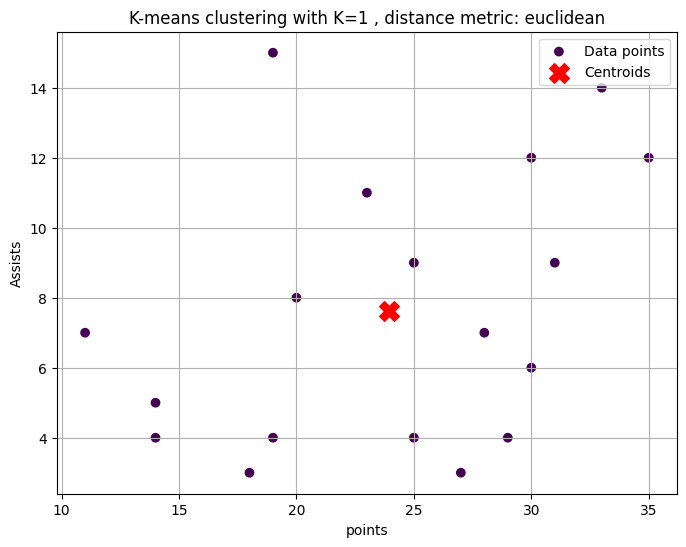

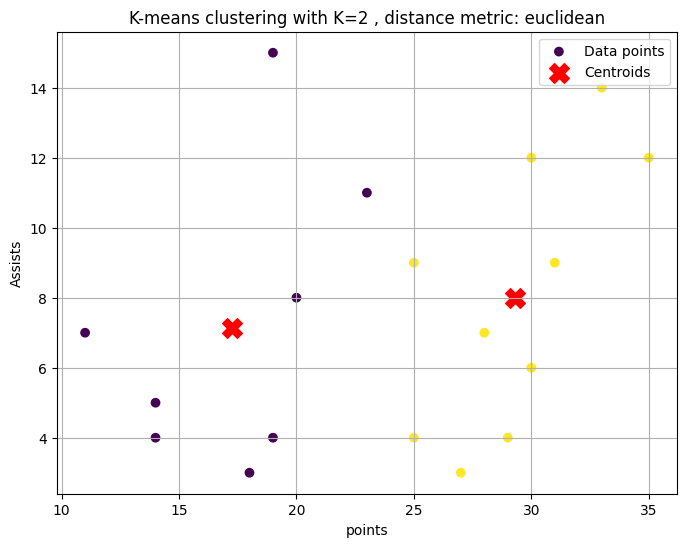

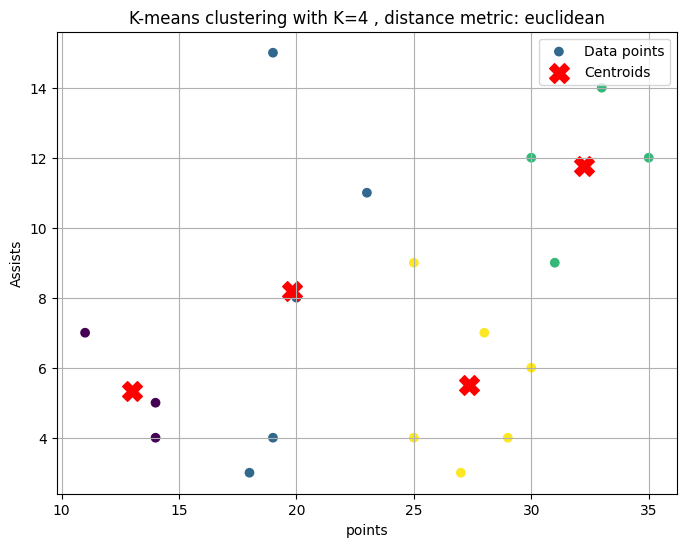

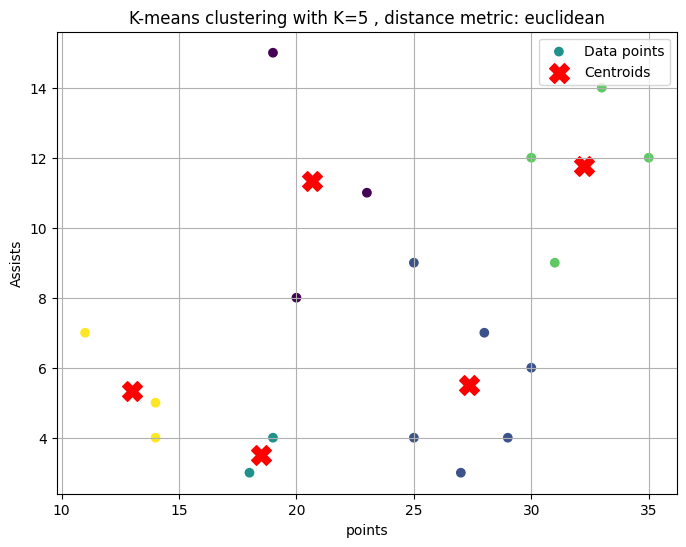

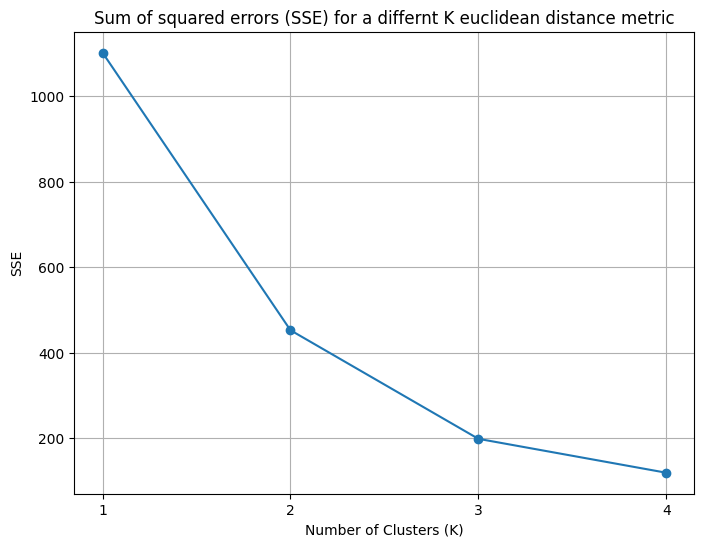

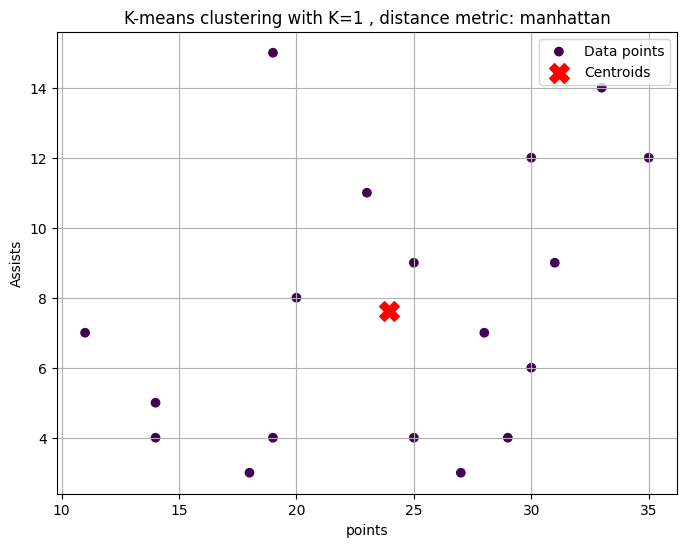

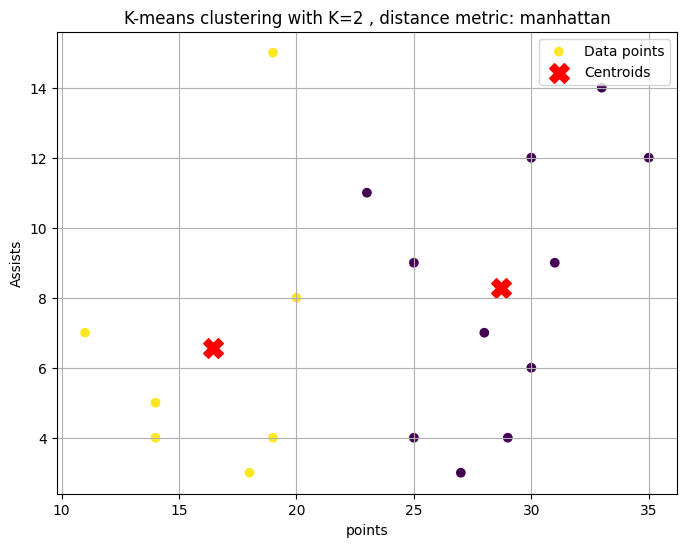

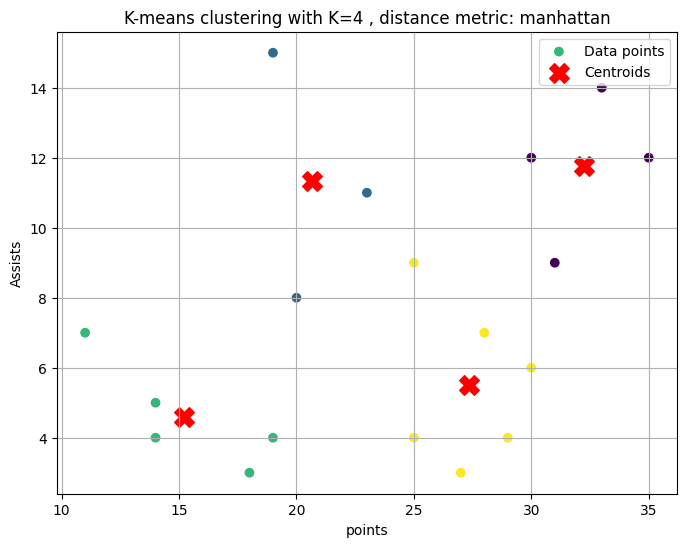

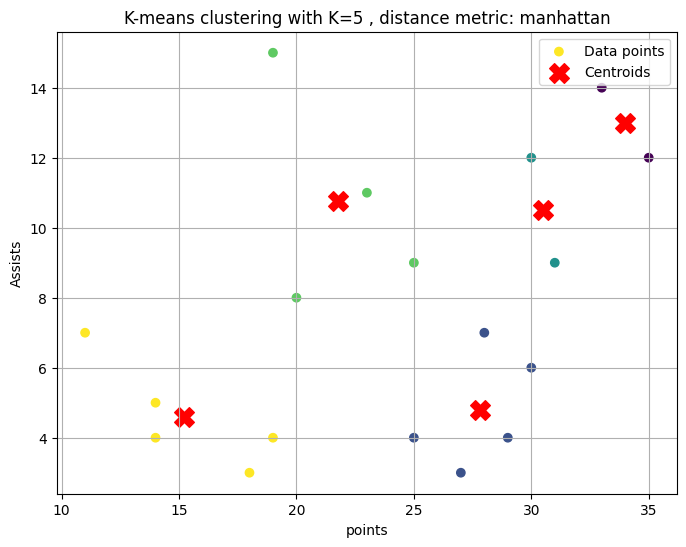

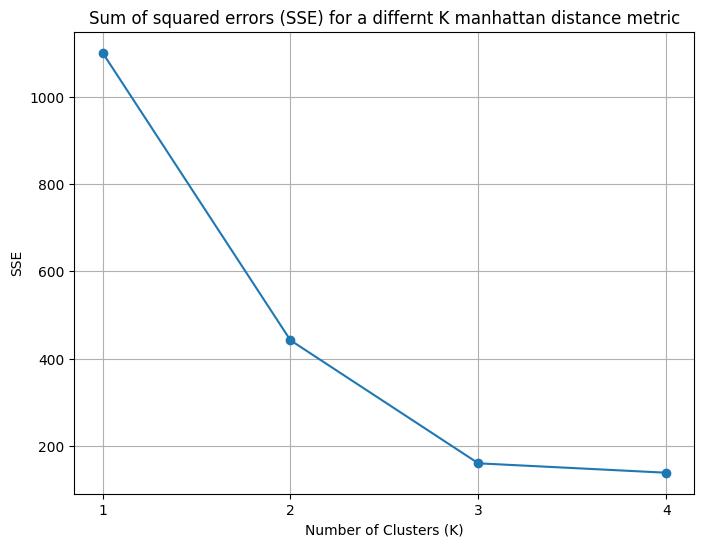

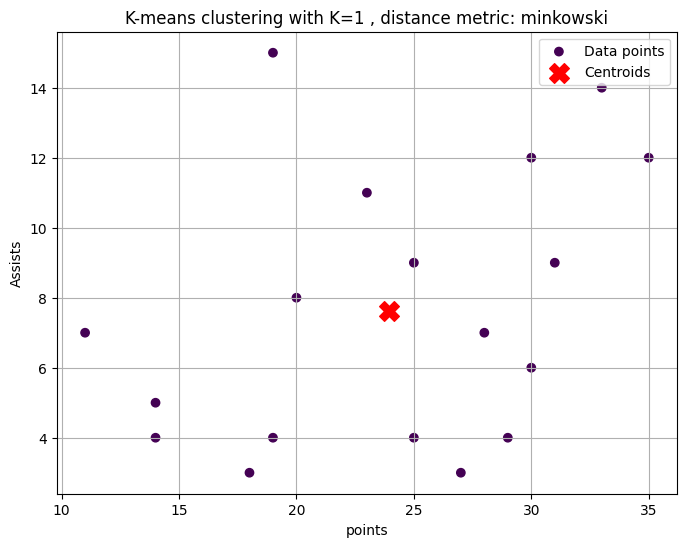

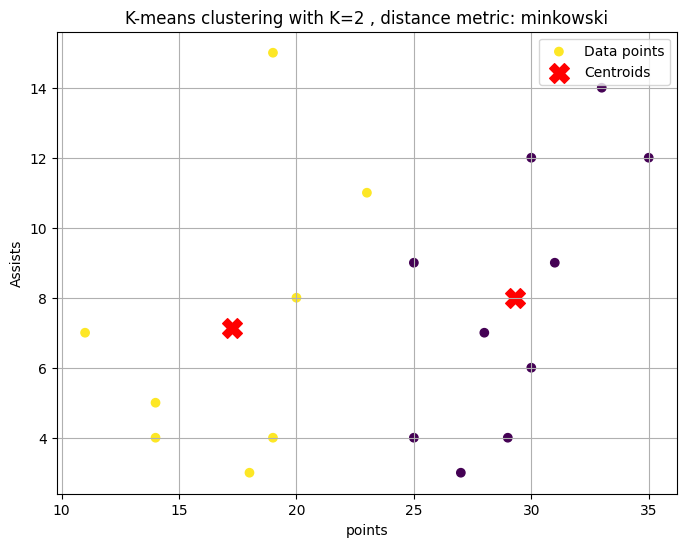

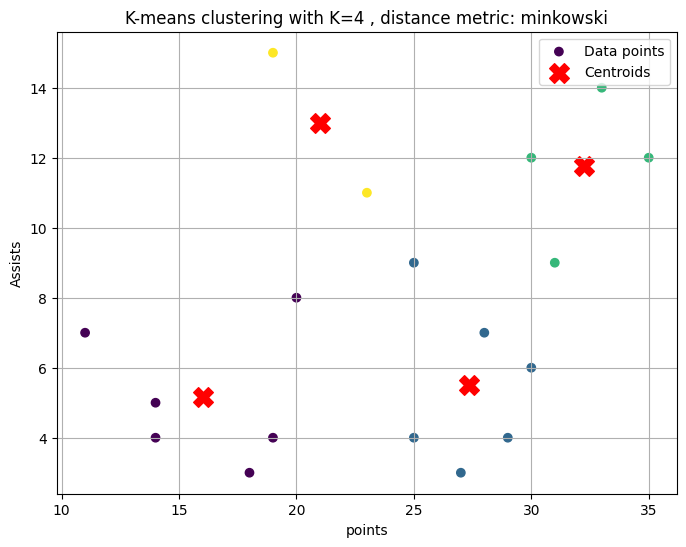

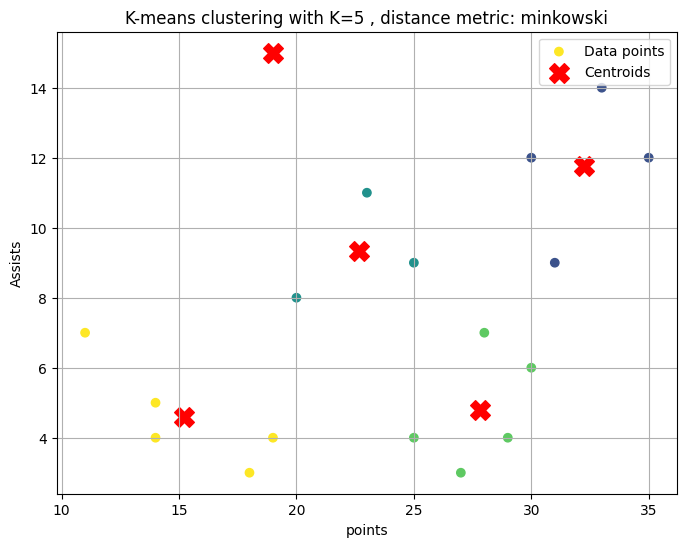

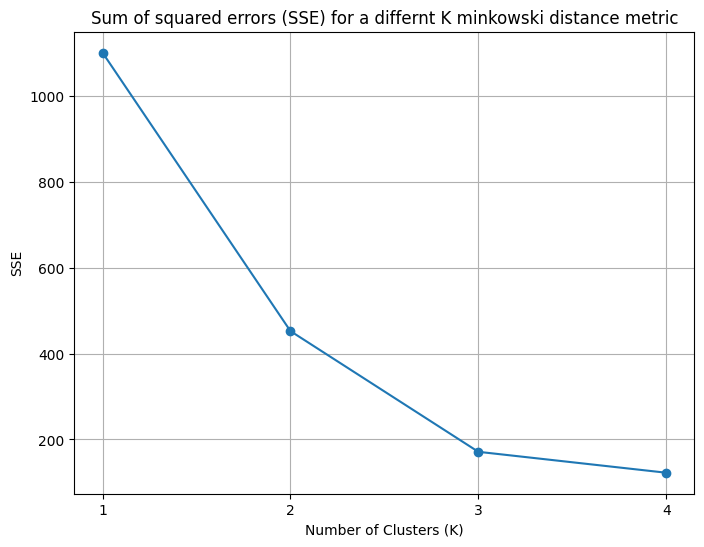

In [24]:
k_values = [1, 2, 4, 5]
distance_metrics = ["euclidean", "manhattan", "minkowski"]
sse_results = {}

for distance_metric in distance_metrics:
    sse_results[distance_metric] = []

    for k in k_values:
        clusters, centroids, sse_history = kmeans(df[['points', 'assists']], k , distance_metric)
        sse_results[distance_metric].append(sse_history[-1])
        plot_clusters(df[['points', 'assists']], clusters, centroids, k , distance_metric)

    plot_sse(sse_results[distance_metric], distance_metric)

In [28]:
sse_df = pd.DataFrame(sse_results, index=k_values)
print("SSE RESULTS:\n")
sse_df

SSE RESULTS:



,euclidean,manhattan,minkowski
1,1101.222222,1101.222222,1101.222222
2,452.475000,441.792208,452.475000
4,198.600000,159.666667,171.166667
5,119.333333,138.100000,122.433333


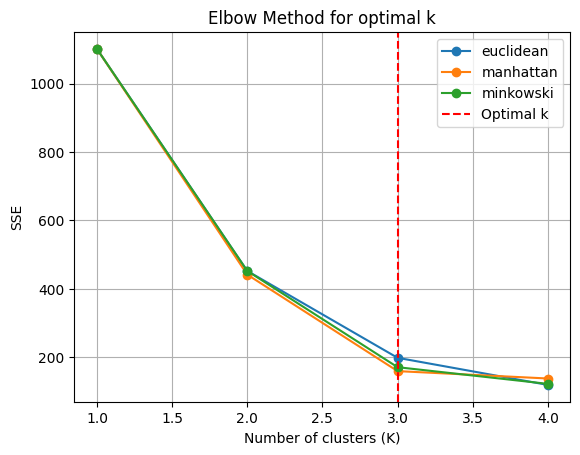

In [31]:
optimal_k = {}
for distance_metric in distance_metrics:
    plt.plot(range(1, len(sse_results[distance_metric]) + 1), sse_results[distance_metric], marker='o', label=distance_metric)
    optimal_k[distance_metric] = np.argmin(np.diff(np.diff(sse_results[distance_metric]))) + 2
plt.axvline(optimal_k[distance_metric], color='red', linestyle='--', label='Optimal k')
plt.title('Elbow Method for optimal k')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')
plt.legend()
plt.grid()
plt.show()